## Notebook du projet *Python pour la Data Science*

Réalisé par:
- **ASKRI Aymane**

### Importer toutes les bibliothèques nécessaires.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Compréhension des données

In [21]:
data_loc = r'data_csv\data.csv'
df = pd.read_csv(data_loc)

Explorer notre ensemble de données est essentiel pour obtenir des informations primordiales. Pour ce faire, nous utiliserons certaines fonctions de pandas pour mettre en évidence les propriétés clés au sein de l'ensemble de données.

In [ ]:
# Afficher les 5 premières ligne de notre data
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
# Un diagramme représentant la distribution des n_points par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_points', data=df)
plt.title('Distribution des n_points par classe')
plt.show()


In [ ]:
# Un diagramme représentant la distribution des n_paths par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_paths', data=df)
plt.title('Distribution des n_paths par classe')
plt.show()

In [ ]:
# Un diagramme représentant la distribution des width par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='width', data=df)
plt.title('Distribution des width par classe')
plt.show()

In [ ]:
# Un diagramme représentant la distribution des height par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='height', data=df)
plt.title('Distribution des height par classe')
plt.show()

In [ ]:
# Un diagramme représentant la distribution des elongation par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='elongation', data=df)
plt.title('Distribution des elongation par classe')
plt.show()

In [ ]:
# Un diagramme représentant la distribution des roundness par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='roundness', data=df)
plt.title('Distribution des roundness par classe')
plt.show()

In [ ]:
# Un diagramme représentant la distribution des lengths par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='length', data=df)
plt.title('Distribution des length par classe')
plt.show()

In [ ]:
# Un diagramme représentant la distribution des areas par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='area', data=df)
plt.title('Distribution des area par classe')
plt.show()

In [ ]:
# Créer une matrice de corrélation avec Seaborn
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation entre les Caractéristiques')
plt.show()


In [ ]:
# Créer un pairplot avec Seaborn
sns.pairplot(df, hue='class', palette='husl')
plt.suptitle('Pairplot des Caractéristiques par Classe', y=1.02)
plt.show()


In [ ]:
# Boîtes à moustaches par classe pour width
sns.boxplot(x='class', y='width', data=df)
plt.title('Distribution de Width par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour n_paths
sns.boxplot(x='class', y='n_paths', data=df)
plt.title('Distribution de n_paths par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour height
sns.boxplot(x='class', y='height', data=df)
plt.title('Distribution de Height par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour n_points
sns.boxplot(x='class', y='n_points', data=df)
plt.title('Distribution de n_points par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour elongation
sns.boxplot(x='class', y='elongation', data=df)
plt.title('Distribution de elongation par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour roundness
sns.boxplot(x='class', y='roundness', data=df)
plt.title('Distribution de roundness par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour length
sns.boxplot(x='class', y='length', data=df)
plt.title('Distribution de length par Classe')
plt.show()

In [ ]:
# Boîtes à moustaches par classe pour area
sns.boxplot(x='class', y='area', data=df)
plt.title('Distribution de area par Classe')
plt.show()

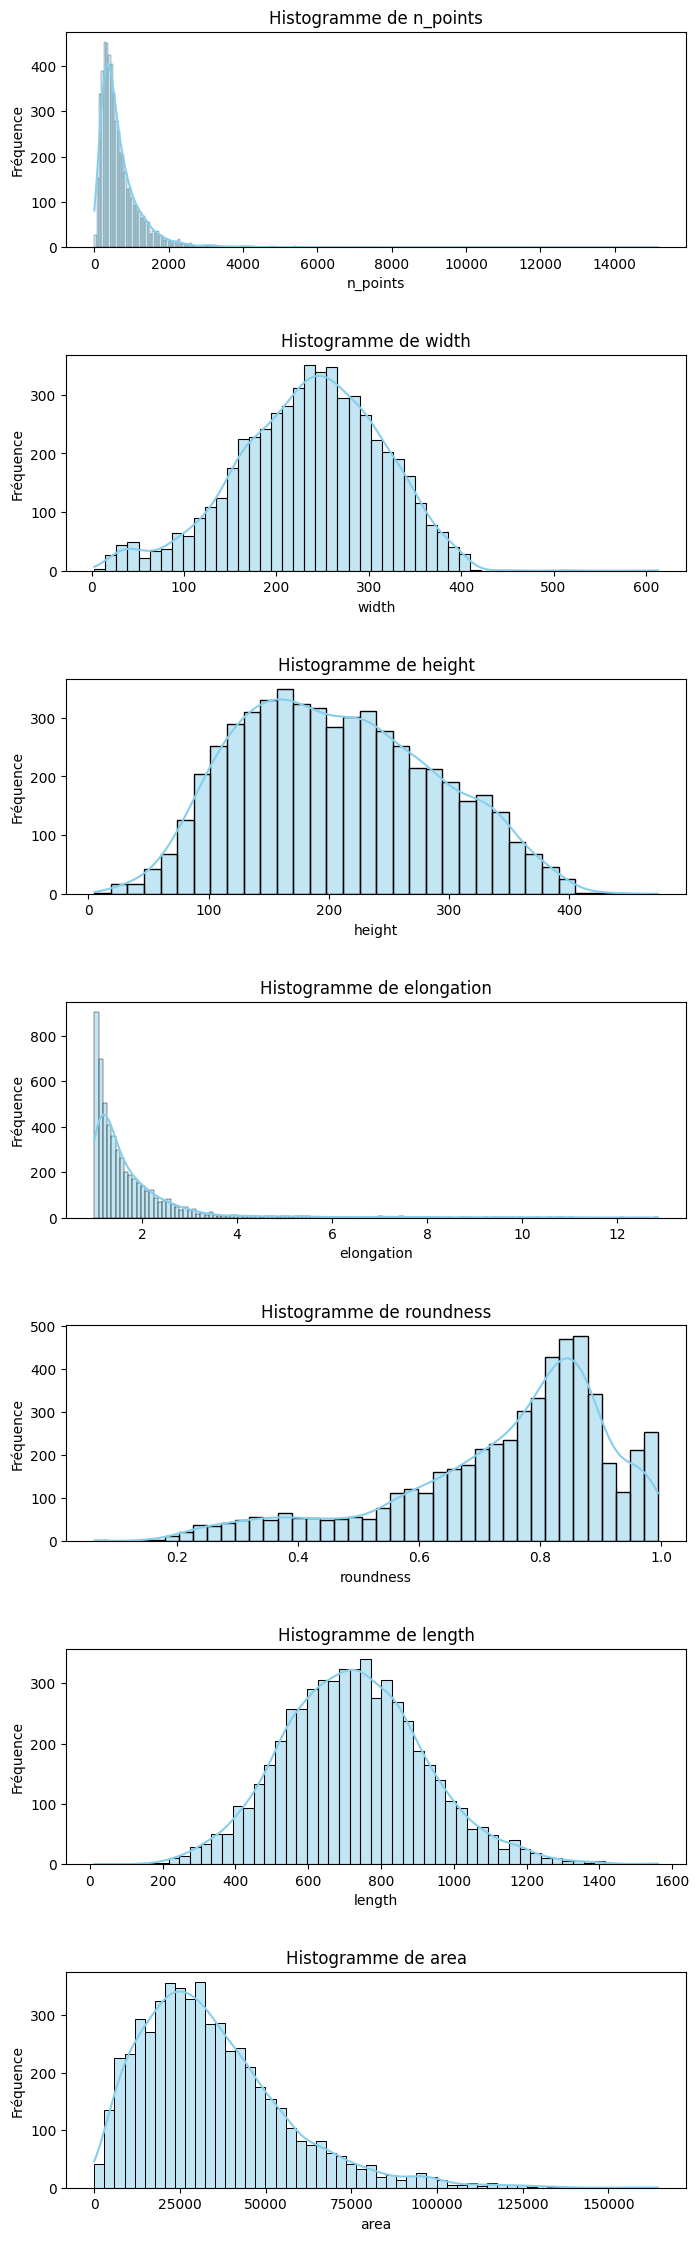

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Caractéristiques à inclure dans les histogrammes
features = ['n_points', 'width', 'height', 'elongation', 'roundness', 'length', 'area']

# Créer un sous-plots pour les histogrammes
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4 * len(features)))

# Ajuster la disposition des sous-plots
fig.subplots_adjust(hspace=0.5)

# Parcourir chaque caractéristique et créer un histogramme
for i, feature in enumerate(features):
    # Créer un histogramme avec Seaborn
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue')
    
    # Ajouter des titres et des étiquettes
    axes[i].set_title(f'Histogramme de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fréquence')

plt.show()


## Modèle Restreint
Nous commencerons par construire un modèle restreint, qui est un modèle contenant uniquement deux colonnes. Cela nous aidera à avoir une première idée des performances de notre modèle.

Analyse de corrélation linéaire
La carte de corrélation fournit un aperçu de la corrélation linéaire entre les variables en visualisant les coefficients de corrélation. Le coefficient de corrélation quantifie la force et la direction d'une relation linéaire entre deux variables.

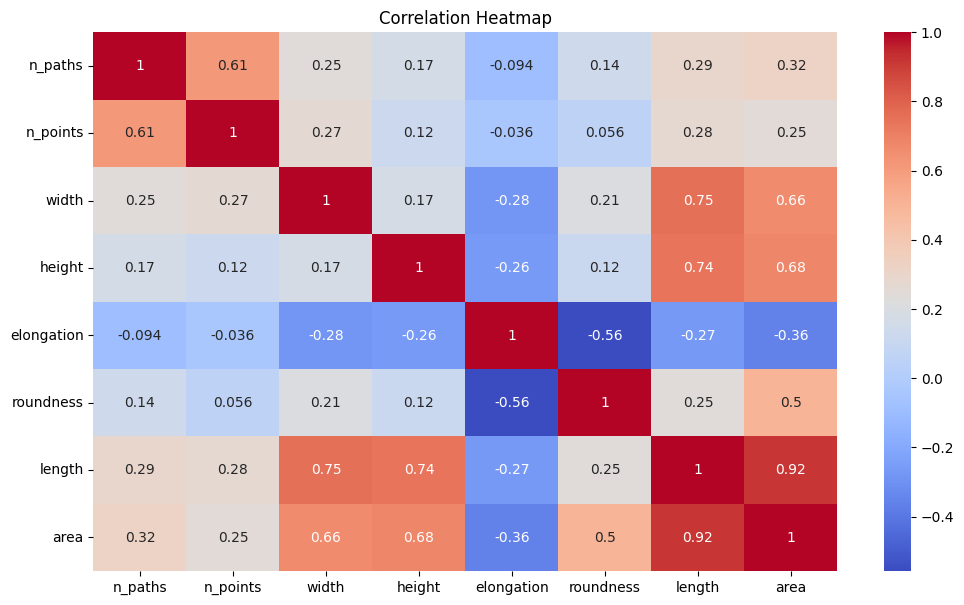

In [25]:
# Calculating correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Creating a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Répartition des données et construction du modèle
Maintenant, on va encoder et scaler nos donner pour avoir une meilleur qualité et apres on va entrainer nos données en utilisant differents model afin d'avoir le meilleur score

In [ ]:
classes = df.columns.values
X = df.drop( columns= ['class' ])
y = df['class']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state= 23,
    test_size= .15,
    stratify= y
)

In [ ]:
# Définir une plage de valeurs pour n_neighbors
neighbors_values = range(1, 21)

# Initialiser des listes pour stocker les scores d'entraînement et de test
train_scores, test_scores = [], []

# Boucle pour tester différentes valeurs de n_neighbors
for n in neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Stocker les scores d'entraînement et de test
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Créer un graphique avec Matplotlib
plt.figure(figsize=(10, 6))

# Tracer les scores d'entraînement
plt.plot(neighbors_values, train_scores, label='Train Score', marker='o')

# Tracer les scores de test
plt.plot(neighbors_values, test_scores, label='Test Score', marker='o')

# Ajouter des titres et des étiquettes
plt.title('Scores d\'entraînement et de test pour différentes valeurs de n_neighbors')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("test_score", svm.score(X_test, y_test))
print("train_score", svm.score(X_train, y_train))


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
C = np.linspace(0.01, 100, 100)


In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C' : C
}
grid_search = GridSearchCV(model, param_grid, cv= 5)
grid_search.fit(X, y)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_model.score(X, y)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'C' : [0.001, .01, .1, 1 , 10, 100, 1000],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma' : [.0001, .001, .01, 1, 10],
    'class_weight' : [None, 'balanced'],
    'probability' : [False, True]
}

search_grid = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

In [ ]:
print(grid_search.score(X_test, y_test))
print(grid_search.score(X_train, y_train))


In [ ]:
test_acc = []
train_acc = []
for c in C:
    lg = LogisticRegression(C=c)
    lg.fit(X_train, y_train)
    train_acc.append(lg.score(X_train, y_train))
    test_acc.append(lg.score(X_test, y_test))

from matplotlib import pyplot as plt
plt.plot(C, train_acc, c='g')
plt.plot(C, test_acc, c='r')
plt.show()

In [ ]:
# Modèle de Régression Logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Régression Logistique Score:", model.score(X_test, y_test))

# Modèle k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("k-NN Score:", model.score(X_test, y_test))

# Modèle SVM (Support Vector Machine)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
print("SVM Score:", model.score(X_test, y_test))
print("SVM Score:", model.score(X_train, y_train))

# Modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Random Forest Score:", model.score(X_test, y_test))


In [ ]:
# Modèle de Machine à Vecteurs de Support (SVM) avec noyau linéaire
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
print("LinearSVC Score:", model.score(X_test, y_test))

# Modèle de Machine à Vecteurs de Support (SVM) avec noyau gaussien (RBF)
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print("SVM with RBF Kernel Score:", model.score(X_test, y_test))

# Modèle de Réseaux de Neurones Artificiels (ANN) avec scikit-learn
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
print("Neural Network Score:", model.score(X_test, y_test))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
model = MLPClassifier(random_state=61)
param_grid = {
    'random_state': [np.random.randint(0,100, 10)] #62
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

In [ ]:
model = grid_search.best_estimator_

En fin on va enregister le modele qui possed la meilleur accuracy et le tester un peu

In [ ]:
import pickle
with open(r'model\model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open(r'model\scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(r'model\encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)
    

In [ ]:
model.score(X_test, y_test)

In [ ]:
print(grid_search.predict(X[:10]))
print(y[:10])
print(label_encoder.inverse_transform(y[:10]))
print(label_encoder.inverse_transform(grid_search.predict(X[:10])))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = grid_search.predict(X)
confusion = confusion_matrix( y, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
